In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

Kesikli veriler ile sınıflandırma yapılır bunu lojistik regresyon ile yapabiliriz.   
     
**Kategorik(Kalitatif, Nitel) Veri :**    
Ölçülemeyen, üzerinden sayısal işlem yapılamayan nesnel verilerdir.    
Cinsiyet, saç rengi vb. nitel özellikleri belirten veriler.    
Nitel veriyle veri kümesindeki gözlemlere ilişkin sıfatlar ya da durumlar tespit edilir.    
Eğitim durumu, ev sahibi olup olmama gibi…Kategorik veriler nominal ve ordinal olmak üzere **iki gruba ayrılır :**   
   
**Sınıflanabilen (Nominal):**  
Bir nominal niteliği ; gözlemlerin adları, yada sembolleri olarak düşünebiliriz.   
Bu değerler bir kategoriyi veya durumu temsil eder ve bu nedenle kategorik özellik olarak adlandırılırlar.   
Sınıfların aralarında hiyerarşik bir yapı yoktur. Araba markası, renk,meslek,il,cinsiyet gibi…   
   
**Sıralanabilen (Ordinal):**   
Sıralayıcı nitel veriler aralarında anlamlı bir sıra veya derecelendirmeye sahip değerler içerir.   
Değerleri arasında sıralı bir ilişki bulunur. Akademik unvan, rütbe, öğrenim durumu,sınav notları gibi.

**Numerik(Kantitatif,Nicel) Veri :**   
Ölçülebilen, üzerinde aritmetik işlemler yapılabilen veri tipidir.   
Boy, kilo, hizmet süreleri, hava sıcaklığı, kandaki bir bileşenin miktarı…    
Nicel veriler kesikli ve sürekli olmak üzere **iki şekilde incelenmektedir :**  
   
**Discrete (Kesikli) Sayısal Veriler:**   
Sonlu veya sayılabilir bir şekilde sonsuz değerler dizisine sahiptir.   
Gözlemlere ait özelliklerin tam sayılarla ifade edildiği veri kümeleridir. 0, 1, 2, 3 vb. tam sayı değerler… 
   
**Continious (Sürekli) Sayısal Veriler:**   
Sonsuz sayıda değer alabilen ve kesirli değerleri de içeren veri setleridir.   
7.00, 99.846, 200.1365 vb. değerler sürekli verilere örnek verilebilir   
   
Aralıklı (Interval): Hem sırayı hem de farkı gösterir. Eşit aralıkların eşit mesafeleri temsil ettiği bir ölçek türüdür.    
Sayılar arasında oransal bir ilişki yoktur. Sıcaklık bunun için iyi bir örnektir.   
25°C ile 30°C arasındaki fark, 40 °C ile 45 °C arasındaki farkla aynıdır.   
Aralık değişkenleri ile ilgili en önemli nokta, mutlak bir sıfır noktası bulunmamasıdır.   
Örneğin, 0°C sıcaklığı, havada hiç sıcaklık olmadığı anlamına gelmez!   
     
Oranlı (Ratio):   
Sırayı, mesafeyi ve anlamlı bir mutlak sıfır değerini gösterir.   
Bir oran değişkeni 0 değerine sahip olduğunda, değişken tarafından ölçülen miktarın hiçbirinin mevcut olmadığını anlarız.   
Örnek olarak, yaş bir oran değişkenidir: 0 yaşında biri henüz doğmamıştır ve 20 yaşında biri 10 yaşında birinin iki katı yaşamıştır.     

**Binary Lojistik regresyonda hedefin 0 yada 1 olduğu durumlarda uygulanır örneğin müşteriye kredi ver yada verme?**   
Resimler klasöründe LinearRegresyonKesikliVeriHatası resmine bakınız   
Lojistik Regresyon Çeşitleri için resimler klaösrüne bakınız   

**Veri Seti:**   
train_kredi_tahmini   
test_kredi_tahmini   

In [2]:
df=pd.read_csv("train_kredi_tahmini.csv")
df2=pd.read_csv("test_kredi_tahmini.csv")

In [3]:
df.shape , df.dtypes

((614, 13),
 Loan_ID               object
 Gender                object
 Married               object
 Dependents            object
 Education             object
 Self_Employed         object
 ApplicantIncome        int64
 CoapplicantIncome    float64
 LoanAmount           float64
 Loan_Amount_Term     float64
 Credit_History       float64
 Property_Area         object
 Loan_Status           object
 dtype: object)

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Örnek Kodlar=https://www.kaggle.com/code/colecola/kredi-tahmini-1

**Eksik verileri tamamla kolonlarını yeniden isimlenidir hepsini sayısal veriye dönüştür ve sonra ölçeklendir.**

---

**Education** (Egitim_Durumu) için:   
    graduate :1   
    not graduate:0   

<AxesSubplot:xlabel='Education', ylabel='count'>

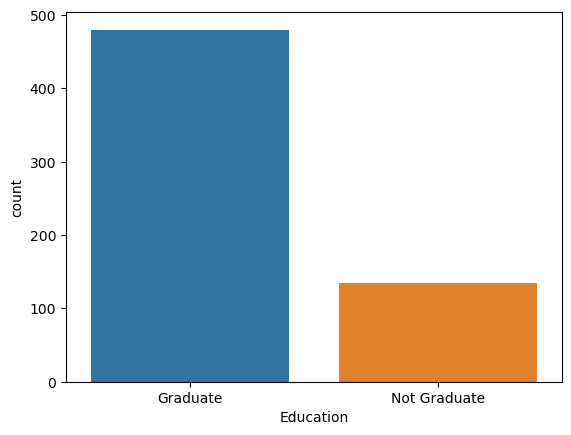

In [5]:
sns.countplot(x="Education",data=df)

In [6]:
print("""
{}
---------------------------
{}
---------------------------
{}
---------------------------
{}
""".format(df.Education.info() , df.Education.describe() , df.Education.unique() , df.Education.value_counts()))


<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Education
Non-Null Count  Dtype 
--------------  ----- 
614 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB

None
---------------------------
count          614
unique           2
top       Graduate
freq           480
Name: Education, dtype: object
---------------------------
['Graduate' 'Not Graduate']
---------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64



In [7]:
def education(row):
    if(row=="Graduate"):
        return 1
    else:
        return 0

In [8]:
df["Education"]=df["Education"].apply(education)
df["Education"]

0      1
1      1
2      1
3      0
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Name: Education, Length: 614, dtype: int64

---

**Gender** (Cinsiyet):   
    Male  :0   
    Female:1   

<AxesSubplot:xlabel='Gender', ylabel='count'>

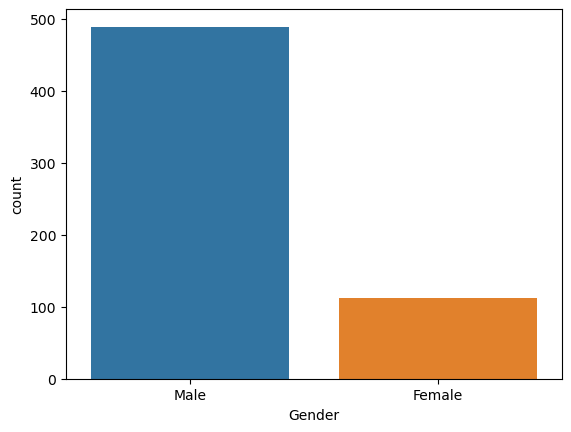

In [9]:
sns.countplot(x="Gender",data=df)

In [10]:
print("""
{}
---------------------------
{}
---------------------------
{}
---------------------------
{}
""".format(df["Gender"].info() , df["Gender"].describe() , df["Gender"].unique() , df["Gender"].value_counts()))

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Gender
Non-Null Count  Dtype 
--------------  ----- 
601 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB

None
---------------------------
count      601
unique       2
top       Male
freq       489
Name: Gender, dtype: object
---------------------------
['Male' 'Female' nan]
---------------------------
Male      489
Female    112
Name: Gender, dtype: int64



In [11]:
def gender(row):
    if(row=="Female"):
        return 1
    else:
        return 0

In [12]:
df["Gender"]=df["Gender"].apply(gender)

In [13]:
df["Gender"]

0      0
1      0
2      0
3      0
4      0
      ..
609    1
610    0
611    0
612    0
613    1
Name: Gender, Length: 614, dtype: int64

---

**Married**(Medeni_Hali):   
    Yes:1   
    No:0   

<AxesSubplot:xlabel='Married', ylabel='count'>

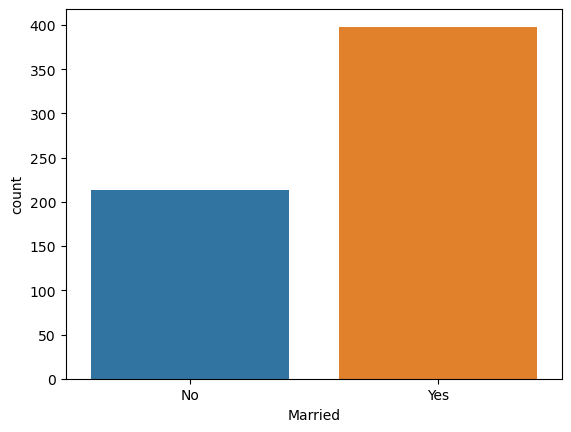

In [14]:
sns.countplot(x="Married",data=df)

In [15]:
print("""
{}
---------------------------
{}
---------------------------
{}
---------------------------
{}
""".format(df["Married"].info() , df["Married"].describe() , df["Married"].unique() , df["Married"].value_counts()))

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Married
Non-Null Count  Dtype 
--------------  ----- 
611 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB

None
---------------------------
count     611
unique      2
top       Yes
freq      398
Name: Married, dtype: object
---------------------------
['No' 'Yes' nan]
---------------------------
Yes    398
No     213
Name: Married, dtype: int64



In [16]:
def married(row):
    if(row=="No"):
        return 0
    else:
        return 1

In [17]:
df["Married"]=df["Married"].apply(married)

In [18]:
df["Married"]

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int64

---

**LoanID** : Silinecek

In [19]:
df.drop("Loan_ID",axis=1,inplace=True)

In [20]:
try:
    print(df["Loan_ID"])
except KeyError:
    print("Sütun bulunamadı.")

Sütun bulunamadı.


---

**Dependents** (CocukSayisi):Sayısala Dönüşecek Ordinal

<AxesSubplot:xlabel='Dependents', ylabel='count'>

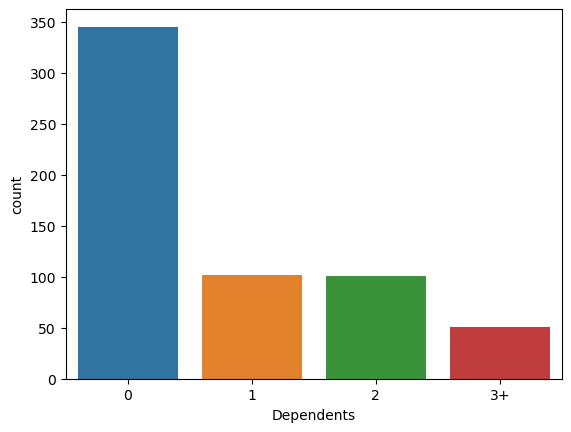

In [21]:
sns.countplot(x="Dependents",data=df)

In [22]:
print("""
{}
---------------------------
{}
---------------------------
{}
---------------------------
{}
""".format(df["Dependents"].info() , df["Dependents"].describe() , df["Dependents"].unique() , df["Dependents"].value_counts()))

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Dependents
Non-Null Count  Dtype 
--------------  ----- 
599 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB

None
---------------------------
count     599
unique      4
top         0
freq      345
Name: Dependents, dtype: object
---------------------------
['0' '1' '2' '3+' nan]
---------------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64



In [23]:
def dependents(row):
    if(row=="1" or row=="2" or row=="3"):
        return 0
    else:
        return 1
    
def dependents_1(row):
    if(row=="1"):
        return 1
    else:
        return 0

def dependents_2(row):
    if(row=="2"):
        return 1
    else:
        return 0

def dependents_3(row):
    if(row=="3+"):
        return 1
    else:
        return 0

In [24]:
df["Dependents_0"]=df["Dependents"].apply(dependents)
df["Dependents_1"]=df["Dependents"].apply(dependents_1)
df["Dependents_2"]=df["Dependents"].apply(dependents_2)
df["Dependents_3+"]=df["Dependents"].apply(dependents_3)
df.drop("Dependents",axis=1,inplace=True)

In [25]:
df[["Dependents_0","Dependents_1","Dependents_2","Dependents_3+"]]

,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
609,1,0,0,0
610,1,0,0,1
611,0,1,0,0
612,0,0,1,0


---

**SelfEmployed** (Patron):    
    Yes:1   
    No:0   

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

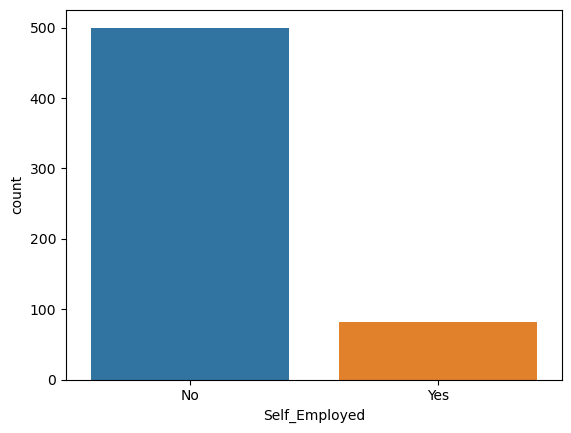

In [26]:
sns.countplot(x="Self_Employed",data=df)

In [27]:
print("""
{}
---------------------------
{}
---------------------------
{}
---------------------------
{}
""".format(df["Self_Employed"].info() , df["Self_Employed"].describe() , df["Self_Employed"].unique() , df["Self_Employed"].value_counts()))

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Self_Employed
Non-Null Count  Dtype 
--------------  ----- 
582 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB

None
---------------------------
count     582
unique      2
top        No
freq      500
Name: Self_Employed, dtype: object
---------------------------
['No' 'Yes' nan]
---------------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64



In [28]:
def self_employed(row):
    if(row=="Yes"):
        return 1
    else:
        return 0

In [29]:
df["Self_Employed"]=df["Self_Employed"].apply(self_employed)

In [30]:
df["Self_Employed"]

0      0
1      0
2      1
3      0
4      0
      ..
609    0
610    0
611    0
612    0
613    1
Name: Self_Employed, Length: 614, dtype: int64

---

**ApplicantIncome** (GelirDuzeyi):Olduğu Gibi Kalacak   
**CoapplicantIncome** (EkGelirDuzeyi):Olduğu Gibi Kalacak   
**LoanAmount** (KrediMiktarı):Olduğu Gibi Kalacak   
**Loan_Amount_Term** (KrediVadesi):Olduğu Gibi Kalacak   
**Credit_History** (OncedenKrediAlmismi):Olduğu Gibi Kalacak

In [31]:
df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]].isnull().sum()

ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
dtype: int64

<AxesSubplot:>

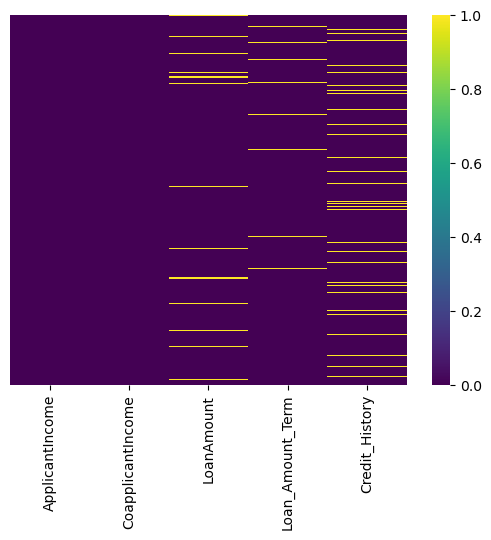

In [32]:
sns.heatmap(df[["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term","Credit_History"]].isnull(),yticklabels=False,cmap="viridis")

In [33]:
df["LoanAmount"].describe()[1]

146.41216216216216

In [34]:
def loan_amount(row):
    if(row<0 or row>=0):
        return row
    else:
        return 146.412162

In [35]:
df["Loan_Amount_Term"].describe()[1]

342.0

In [36]:
def loan_amount_term(row):
    if(row<0 or row>=0):
        return row
    else:
        return 342.00000

In [37]:
df["Credit_History"].describe()[1]

0.8421985815602837

In [38]:
def credit_history(row):
    if(row<0 or row>=0):
        return row
    else:
        return 0.842199

In [39]:
df["LoanAmount"]=df["LoanAmount"].apply(loan_amount)
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].apply(loan_amount_term)
df["Credit_History"]=df["Credit_History"].apply(credit_history)

In [40]:
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,Y,1,0,0,0
1,0,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,N,0,1,0,0
2,0,1,1,1,3000,0.0,66.000000,360.0,1.0,Urban,Y,1,0,0,0
3,0,1,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y,1,0,0,0
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,Y,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,1,0,2900,0.0,71.000000,360.0,1.0,Rural,Y,1,0,0,0
610,0,1,1,0,4106,0.0,40.000000,180.0,1.0,Rural,Y,1,0,0,1
611,0,1,1,0,8072,240.0,253.000000,360.0,1.0,Urban,Y,0,1,0,0
612,0,1,1,0,7583,0.0,187.000000,360.0,1.0,Urban,Y,0,0,1,0


---

**Property_Area** (one hot encode): Urban=Kentsel rural=Kırsal semiurban=Yarı_kentsel

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

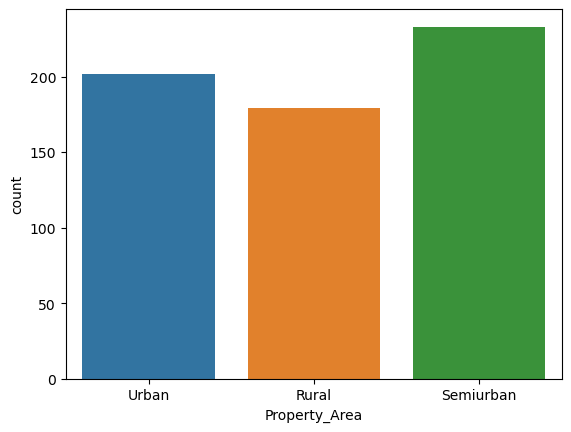

In [41]:
sns.countplot(x="Property_Area",data=df)

In [42]:
print("""
{}
---------------------------
{}
---------------------------
{}
---------------------------
{}
""".format(df["Property_Area"].info() , df["Property_Area"].describe() , df["Property_Area"].unique() , df["Property_Area"].value_counts()))

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Property_Area
Non-Null Count  Dtype 
--------------  ----- 
614 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB

None
---------------------------
count           614
unique            3
top       Semiurban
freq            233
Name: Property_Area, dtype: object
---------------------------
['Urban' 'Rural' 'Semiurban']
---------------------------
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64



In [43]:
def propertyAreaUrban(row):
    if(row=="Urban"):
        return 1
    else:
        return 0
def propertyAreaRural(row):
    if(row=="Rural"):
        return 1
    else:
        return 0
def propertyAreaSemiurban(row):
    if(row=="Semiurban"):
        return 1
    else:
        return 0

In [44]:
df["Kentsel"]=df["Property_Area"].apply(propertyAreaUrban)
df["Kırsal"]=df["Property_Area"].apply(propertyAreaRural)
df["Yarı_kentsel"]=df["Property_Area"].apply(propertyAreaSemiurban)
df.drop("Property_Area",axis=1,inplace=True)

In [45]:
df[["Kentsel","Kırsal","Yarı_kentsel"]]

,Kentsel,Kırsal,Yarı_kentsel
0,1,0,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
609,0,1,0
610,0,1,0
611,1,0,0
612,1,0,0


---

**Loan_Status** (KrediyeUygun):    
    Bu alan y olarak farklı bir dataframe olacak ve bu tahmin ettirilecek eğitim  ve tets dataframe'inden çıkarılacak   
    Yes:1   
    No:0   

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

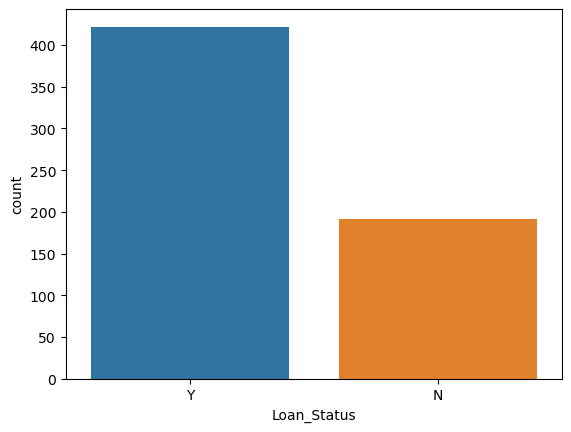

In [46]:
sns.countplot(x="Loan_Status",data=df)

In [47]:
y=pd.DataFrame(df,columns=["Loan_Status"])
y.head()

,Loan_Status
0,Y
1,N
2,Y
3,Y
4,Y


In [48]:
df.drop("Loan_Status",axis=1,inplace=True)

try:
    df2.drop("Loan_Status",axis=1,inplace=True)
except KeyError:
    print("Silinecek kolon yok.")

Silinecek kolon yok.


In [49]:
df.columns , df2.columns

(Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
        'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
        'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
        'Kentsel', 'Kırsal', 'Yarı_kentsel'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

Ölçeklendir bütün 0 veya 1 arasında olmayanları 0 ve 1 arasına ölçeklendir. 

**Verilerin Son Halleri**

In [50]:
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Kentsel,Kırsal,Yarı_kentsel
0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,0,0,0,1,0,0
1,0,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,1,0,0,0,1,0
2,0,1,1,1,3000,0.0,66.000000,360.0,1.0,1,0,0,0,1,0,0
3,0,1,0,0,2583,2358.0,120.000000,360.0,1.0,1,0,0,0,1,0,0
4,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,0,0,0,1,0,0


---

**Analiz**

In [51]:
x1=df.copy()
y1=y.copy()

In [52]:
def yData(row):
    if(row=="Y"):
        return 1
    else:
        return 0
y1=y1["Loan_Status"].apply(yData)

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

**İstersek train setinden test seti ayırabiliriz örnek**

In [54]:
X_train,X_test,Y_train,Y_test=train_test_split(x1,y1,test_size=0.33,random_state=42)

In [55]:
lg_model=LogisticRegression(max_iter=1000)
lg_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [56]:
print(lg_model.score(X_test,Y_test))
print(lg_model.score(X_train,Y_train))

0.7980295566502463
0.8150851581508516
